In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
plt.rc('figure', facecolor='w', figsize=[4,3])

In [5]:
kmers = list(map(int,"11 13 15 17 19 21 25 31 41 51 61 81 101 151 201 251 301 501".split()))

data_kmers = []
for k in kmers:
    abundances = {}
    mean = 0
    nb_items = 0
    genome_abundance_1_total = 0
    for x,line in enumerate(open("chm13v2.0-"+str(k)+".histo2D")):
        l = list(map(int,line.split()[1:]))
        assert(int(line.split()[0].strip(":")) == x)
        abundances[x]=l
        genome_abundance_1_total += l[1]
        if x == 0:
            genome_abundance_1_missing = l[1]
    data_kmers += [(k,genome_abundance_1_missing/genome_abundance_1_total)]

      k  nb_kmers_abundance_1_in_genome
0    11                        0.005405
1    13                        0.006482
2    15                        0.007661
3    17                        0.006625
4    19                        0.008242
5    21                        0.009541
6    25                        0.011655
7    31                        0.014752
8    41                        0.019969
9    51                        0.025159
10   61                        0.030281
11   81                        0.040278
12  101                        0.049976
13  151                        0.073025
14  201                        0.094585
15  251                        0.114845
16  301                        0.133953
17  501                        0.201145


/home/rayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


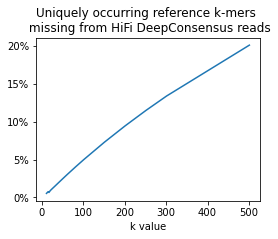

In [7]:

df = pd.DataFrame([x for x in data_kmers],columns=("k","nb_kmers_abundance_1_in_genome"))

print(df)
sns_plot = sns.lineplot(x=df["k"], y=df["nb_kmers_abundance_1_in_genome"])

#sns_plot.set(xscale="log")
#sns_plot.set(xticks=[x/100 for x in range(0,10+1,2)])
#sns_plot.set_xticklabels([str(x-2) for x in range(0,10+3,2)])

ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

#plt.xticks(sns_plot.get_xticks(), sns_plot.get_xticks() * 100)
sns_plot.set(xlabel='k value', ylabel='')
#sns_plot.get_legend().remove()
plt.title('Uniquely occurring reference k-mers \n missing from HiFi DeepConsensus reads')

fig = sns_plot.get_figure()
fig.savefig("seeds_kmers.pdf", bbox_inches='tight', dpi =300)


In [8]:
ksizes = list(map(int,"2 4 6 8 10".split()))

data_kminmers = []
for k in ksizes:
    abundances = {}
    mean = 0
    nb_items = 0
    genome_abundance_1_total = 0
    for x,line in enumerate(open(f"2DHisto-k{k}-d0.01-l31.hist2D")):
        l = list(map(int,line.split()))
        abundances[x]=l
        genome_abundance_1_total += l[1]
        if x == 0:
            genome_abundance_1_missing = l[1]
    data_kminmers += [(k,genome_abundance_1_missing/genome_abundance_1_total)]

    k  nb_kminmers_abundance_1_in_genome
0   2                           0.030202
1   4                           0.059660
2   6                           0.087658
3   8                           0.113969
4  10                           0.138588


/home/rayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


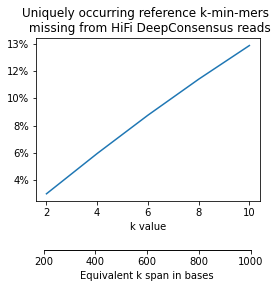

In [10]:
df = pd.DataFrame([x for x in data_kminmers],columns=("k","nb_kminmers_abundance_1_in_genome"))

print(df)
sns_plot = sns.lineplot(x=df["k"], y=df["nb_kminmers_abundance_1_in_genome"])

#sns_plot.set(xscale="log")
#sns_plot.set(xticks=[x/100 for x in range(0,10+1,2)])
#sns_plot.set_xticklabels([str(x-2) for x in range(0,10+3,2)])

ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

#plt.xticks(sns_plot.get_xticks(), sns_plot.get_xticks() * 100)
sns_plot.set(xlabel='k value', ylabel='')
#sns_plot.get_legend().remove()
plt.title('Uniquely occurring reference k-min-mers \n missing from HiFi DeepConsensus reads')


fig = sns_plot.get_figure()

# create second Axes. Note the 0.0 height
ax2 = fig.add_axes((0.15,-0.1,0.72,0.0))
ax2.yaxis.set_visible(False) # hide the yaxis
new_tick_locations = np.array([0,.25, .5,.75,1])
def tick_function(X):
    ksizes = list(map(int," 2 4 6 8 10".split()))
    density=0.01
    return ["%d" % (ksizes[i]/density) for i,z in enumerate(X)]
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Equivalent k span in bases")
plt.show()

fig.savefig("seeds_kminers.pdf", bbox_inches='tight', dpi =300)


{11: (0.005405405405405406, 'k-mers'), 13: (0.006481908164081393, 'k-mers'), 15: (0.0076605748034179865, 'k-mers'), 17: (0.006625045783399147, 'k-mers'), 19: (0.008242296202585599, 'k-mers'), 21: (0.00954085621166587, 'k-mers'), 25: (0.011654667584549585, 'k-mers'), 31: (0.014752136242935183, 'k-mers'), 41: (0.019968663437157034, 'k-mers'), 51: (0.025158718477248706, 'k-mers'), 61: (0.030281245448072095, 'k-mers'), 81: (0.0402784094471087, 'k-mers'), 101: (0.04997587105382414, 'k-mers'), 151: (0.07302543305820425, 'k-mers'), 201: (0.09458454616728654, 'k-mers'), 251: (0.11484534968593219, 'k-mers'), 301: (0.13395338459103132, 'k-mers'), 501: (0.20114499299776084, 'k-mers'), 200.0: (0.030202368329504733, 'k-min-mers'), 400.0: (0.059659843262159604, 'k-min-mers'), 600.0: (0.08765776882524316, 'k-min-mers'), 800.0: (0.11396869434974376, 'k-min-mers'), 1000.0: (0.13858750745705128, 'k-min-mers')}


/home/rayan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


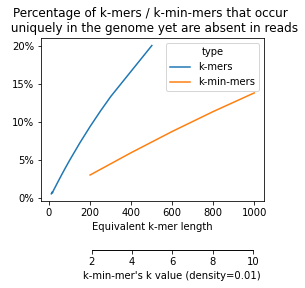

In [23]:
#attempt to merge both plots

def k_to_kspan(k):
    density=0.01
    return k/density

data = {}
for x,y in data_kmers:
    data[x]=(y,"k-mers")
for x,y in data_kminmers:
    kspan = k_to_kspan(x)
    data[kspan] = (y,"k-min-mers")


print(data)
df = pd.DataFrame([(x,data[x][0],data[x][1]) for x in data],columns=("k","perc_kmers_abundance_1_in_genome","type"))
  
sns_plot = sns.lineplot(df,x="k",y="perc_kmers_abundance_1_in_genome",hue="type")

#sns_plot.set(xscale="log")
#sns_plot.set(xticks=[x/100 for x in range(0,10+1,2)])
#sns_plot.set_xticklabels([str(x-2) for x in range(0,10+3,2)])

ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
sns_plot.set_yticklabels(ylabels)

#plt.xticks(sns_plot.get_xticks(), sns_plot.get_xticks() * 100)
sns_plot.set(xlabel='Equivalent k-mer length', ylabel='')
#sns_plot.get_legend().remove()
plt.title('Percentage of k-mers / k-min-mers that occur \n uniquely in the genome yet are absent in reads')


fig = sns_plot.get_figure()
# create second Axes. Note the 0.0 height
ax2 = fig.add_axes((0.3,-0.1,0.56,0.0)) # i didn't determine those params automatically, these are just empirically set
ax2.yaxis.set_visible(False) # hide the yaxis
def tick_function(X):
    ksizes = list(map(int,"2 4 6 8 10".split()))
    return ["%d" % (ksizes[i]) for i,z in enumerate(X)]
new_tick_locations = np.array([0,.25, .5,.75,1])
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("k-min-mer's k value (density=0.01)")
plt.show()

fig.savefig("seeds_2D.pdf", bbox_inches='tight', dpi =300)
